In [8]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# traigo mis funciones
import sys

sys.path.append('../src') #pongo los 2 puntos para que salga de la carpeta
import soporte_funciones as sf

# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product
from itertools import combinations

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv('../datos_3/df_combinado.csv', index_col=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 0 to 352
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            353 non-null    float64
 1   size_stand                       353 non-null    float64
 2   municipality_stand               353 non-null    float64
 3   distance_stand                   353 non-null    float64
 4   status_stand                     353 non-null    float64
 5   floor_stand                      353 non-null    float64
 6   hasLift_stand                    353 non-null    float64
 7   propertyType_chalet_stand        353 non-null    float64
 8   propertyType_countryHouse_stand  353 non-null    float64
 9   propertyType_duplex_stand        353 non-null    float64
 10  propertyType_flat_stand          353 non-null    float64
 11  propertyType_penthouse_stand     353 non-null    float64
 12  propertyType_studio_stand  

In [11]:
# df['propertyType_chalet_stand'] = df['propertyType_chalet_stand'].astype('O')
# df['propertyType_countryHouse_stand'] = df['propertyType_countryHouse_stand'].astype('O')
# df['propertyType_duplex_stand'] = df['propertyType_duplex_stand'].astype('O')
# df['propertyType_flat_stand'] = df['propertyType_flat_stand'].astype('O')
# df['propertyType_penthouse_stand'] = df['propertyType_penthouse_stand'].astype('O')
# df['propertyType_studio_stand'] = df['propertyType_studio_stand'].astype('O')
# df['exterior_False_stand'] = df['exterior_False_stand'].astype('O')
# df['exterior_True_stand'] = df['exterior_True_stand'].astype('O')
# df['rooms_0_stand'] = df['rooms_0_stand'].astype('O')
# df['rooms_2_stand'] = df['rooms_2_stand'].astype('O')
# df['rooms_3_stand'] = df['rooms_3_stand'].astype('O')
# df['rooms_4_stand'] = df['rooms_4_stand'].astype('O')
# df['rooms_1_stand'] = df['rooms_1_stand'].astype('O')
# df['bathrooms_1_stand'] = df['bathrooms_1_stand'].astype('O')
# df['bathrooms_2_stand'] = df['bathrooms_2_stand'].astype('O')
# df['bathrooms_3_stand'] = df['bathrooms_3_stand'].astype('O')

In [12]:
df_num, df_cat = sf.separar_dataframe(df)

In [13]:
df_num

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand
0,750.0,0.011443,0.762605,-0.714088,0.289977,0.480841,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
1,750.0,0.432212,0.310888,-0.040932,0.289977,-0.966375,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
2,400.0,0.305981,-4.730340,2.833801,0.289977,0.359317,-0.760062,-0.092582,-0.0533,-0.203219,-1.909119,5.856620,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,-2.879145,2.922420,-0.0533
3,590.0,0.432212,-2.056015,2.948728,0.289977,-1.593720,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,-0.754247,2.405922,-0.092582,-2.879145,2.922420,-0.0533
4,684.0,-0.619710,0.762605,-0.446614,-4.112120,-1.593720,-2.389728,-0.092582,-0.0533,-0.203219,-1.909119,-0.170747,2.520747,-0.488463,0.488463,2.490799,-0.722185,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,640.0,0.390135,-1.352245,0.932143,0.289977,0.359317,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
349,700.0,-0.241018,-0.256093,-0.372706,0.289977,0.785731,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
350,700.0,-0.030634,0.762605,-0.677725,0.289977,0.464947,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
351,700.0,0.642596,0.116031,1.009599,0.289977,0.785731,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533


In [14]:
cols_numericas = df_num.columns

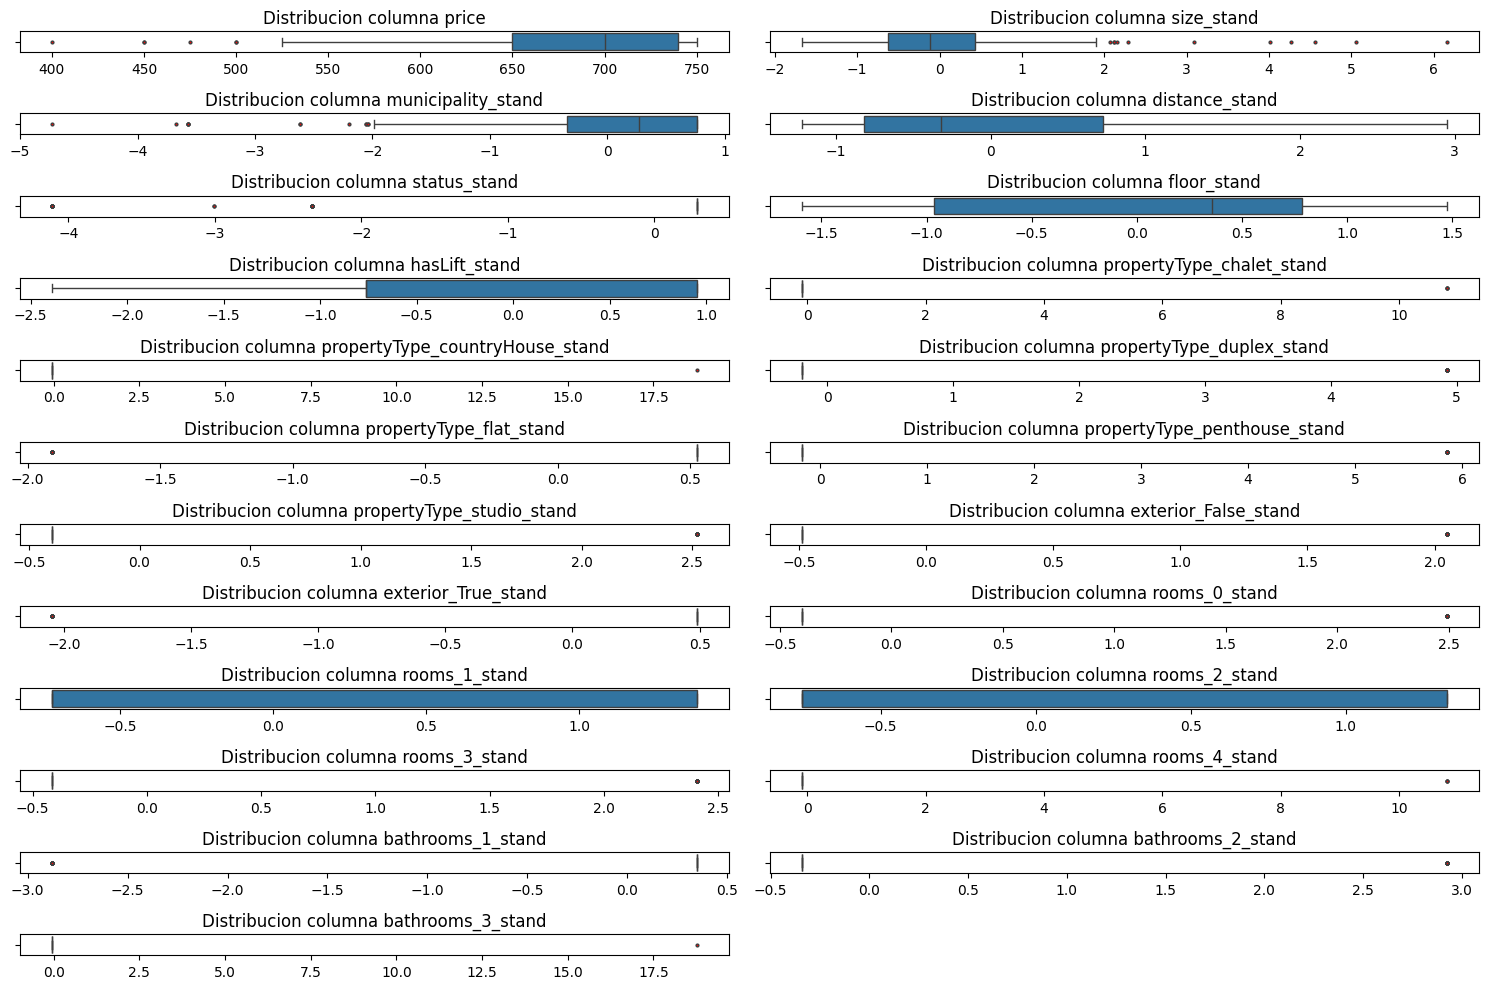

In [15]:
sf.plot_outliers_univariados(df,cols_numericas,'b',50)

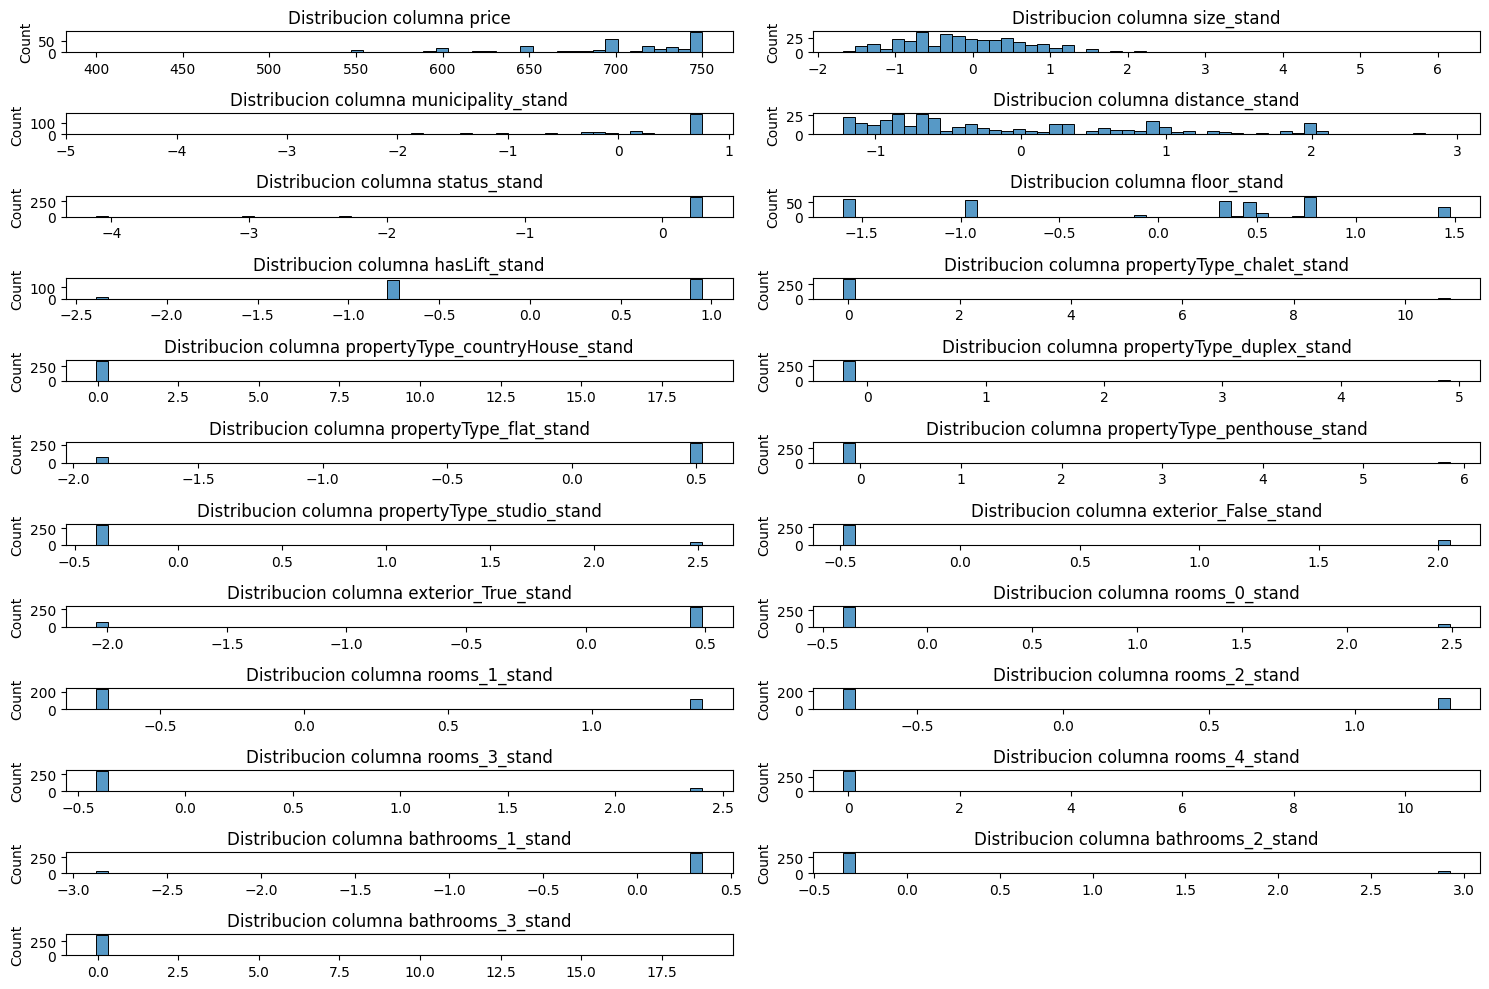

In [16]:
sf.plot_outliers_univariados(df, cols_numericas, 'h', 50)

In [17]:
diccionario_resultados_outliers = sf.identificar_outliers_iqr(df, cols_numericas)

La columna PRICE tiene 6 outliers
La columna SIZE_STAND tiene 11 outliers
La columna MUNICIPALITY_STAND tiene 13 outliers
La columna DISTANCE_STAND tiene 0 outliers
La columna STATUS_STAND tiene 29 outliers
La columna FLOOR_STAND tiene 0 outliers
La columna HASLIFT_STAND tiene 0 outliers
La columna PROPERTYTYPE_CHALET_STAND tiene 3 outliers
La columna PROPERTYTYPE_COUNTRYHOUSE_STAND tiene 1 outliers
La columna PROPERTYTYPE_DUPLEX_STAND tiene 14 outliers
La columna PROPERTYTYPE_FLAT_STAND tiene 76 outliers
La columna PROPERTYTYPE_PENTHOUSE_STAND tiene 10 outliers
La columna PROPERTYTYPE_STUDIO_STAND tiene 48 outliers
La columna EXTERIOR_FALSE_STAND tiene 68 outliers
La columna EXTERIOR_TRUE_STAND tiene 68 outliers
La columna ROOMS_0_STAND tiene 49 outliers
La columna ROOMS_1_STAND tiene 0 outliers
La columna ROOMS_2_STAND tiene 0 outliers
La columna ROOMS_3_STAND tiene 52 outliers
La columna ROOMS_4_STAND tiene 3 outliers
La columna BATHROOMS_1_STAND tiene 38 outliers
La columna BATHROO

# Isolation Forest: identificar outliers

In [18]:
contaminacion = [0.01, 0.05, 0.1]
estimadores = [10, 100, 150]

combinaciones = list(product(contaminacion, estimadores))
combinaciones

[(0.01, 10),
 (0.01, 100),
 (0.01, 150),
 (0.05, 10),
 (0.05, 100),
 (0.05, 150),
 (0.1, 10),
 (0.1, 100),
 (0.1, 150)]

In [19]:
for cont, esti in combinaciones:
    ifo = IsolationForest(random_state=42, #semilla de datos aleatorios
                        n_estimators=esti, #numero de arboles
                        contamination=cont,
                        n_jobs=-1) #nucleos del ordenador

    df[f'outliers_ifo_{cont}_{esti}'] = ifo.fit_predict(df[['price', 'size_stand', 'distance_stand']])

In [20]:
df.head()

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_150,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_150,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_150
0,750.0,0.011443,0.762605,-0.714088,0.289977,0.480841,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1
1,750.0,0.432212,0.310888,-0.040932,0.289977,-0.966375,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1
2,400.0,0.305981,-4.730340,2.833801,0.289977,0.359317,-0.760062,-0.092582,-0.0533,-0.203219,-1.909119,5.856620,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,-2.879145,2.922420,-0.0533,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,590.0,0.432212,-2.056015,2.948728,0.289977,-1.593720,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,-0.754247,2.405922,-0.092582,-2.879145,2.922420,-0.0533,1,1,1,-1,-1,-1,-1,-1,-1
4,684.0,-0.619710,0.762605,-0.446614,-4.112120,-1.593720,-2.389728,-0.092582,-0.0533,-0.203219,-1.909119,-0.170747,2.520747,-0.488463,0.488463,2.490799,-0.722185,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1


In [21]:
columnas_hue = df.filter(like='outlier').columns # se queda con todas las columnas de out

In [22]:
columnas_hue

Index(['outliers_ifo_0.01_10', 'outliers_ifo_0.01_100',
       'outliers_ifo_0.01_150', 'outliers_ifo_0.05_10',
       'outliers_ifo_0.05_100', 'outliers_ifo_0.05_150', 'outliers_ifo_0.1_10',
       'outliers_ifo_0.1_100', 'outliers_ifo_0.1_150'],
      dtype='object')

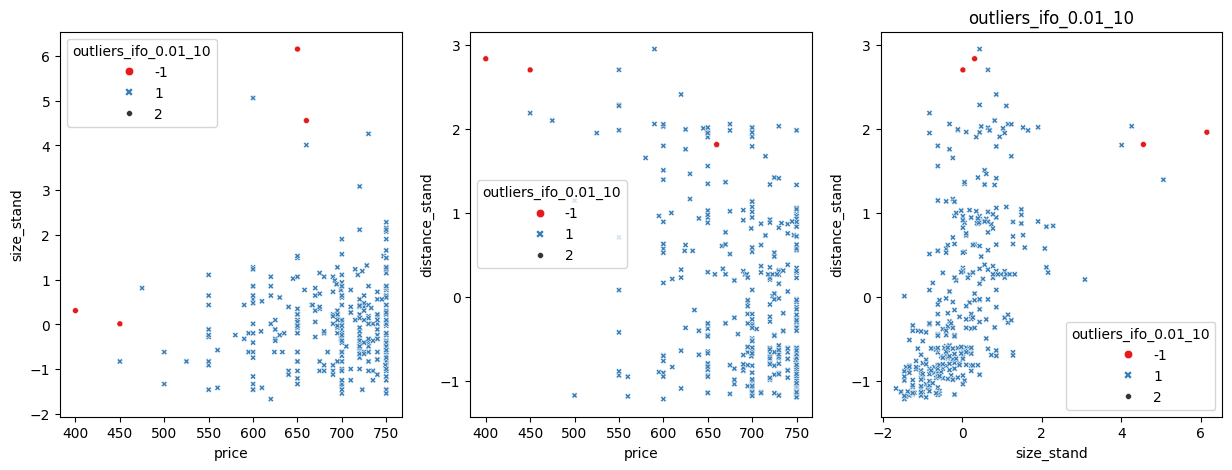

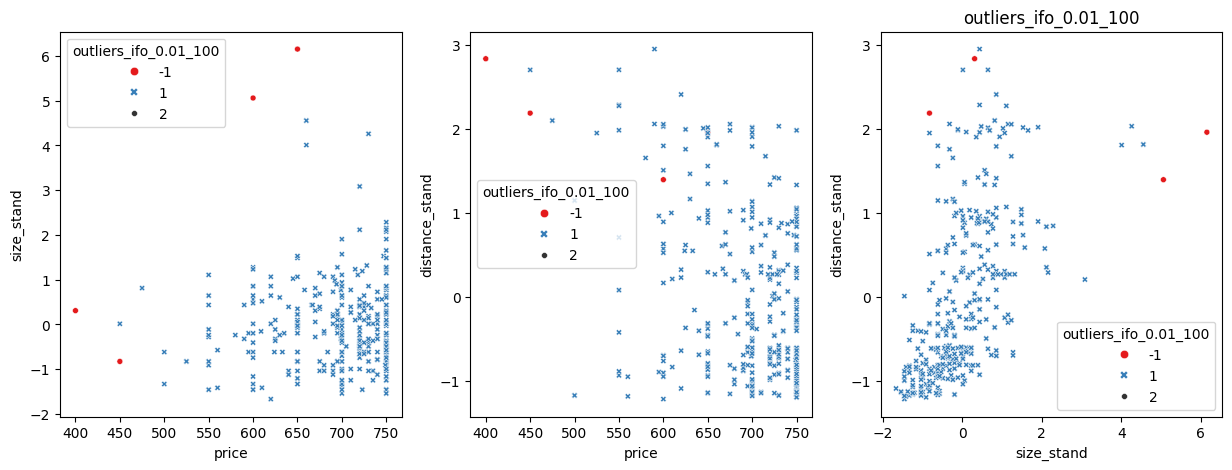

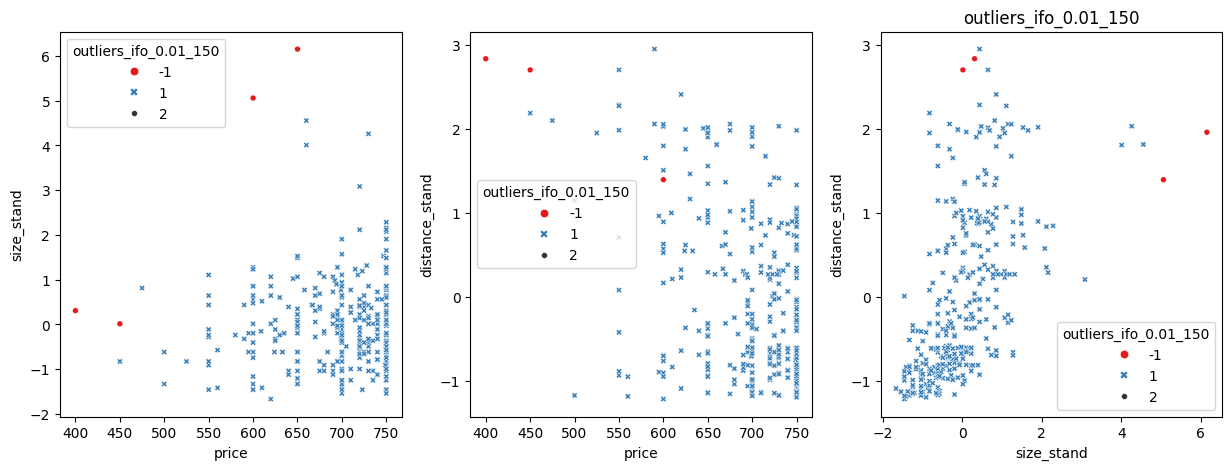

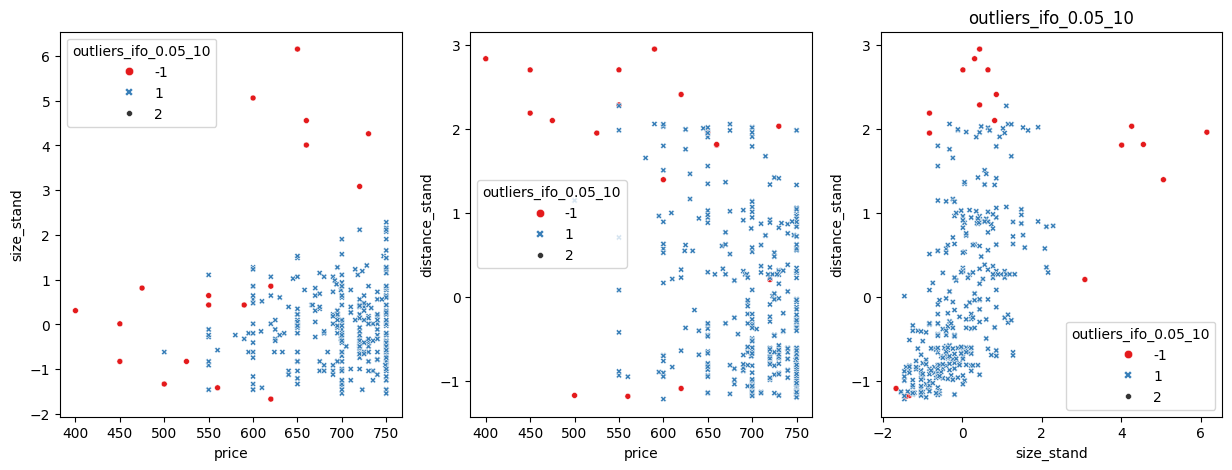

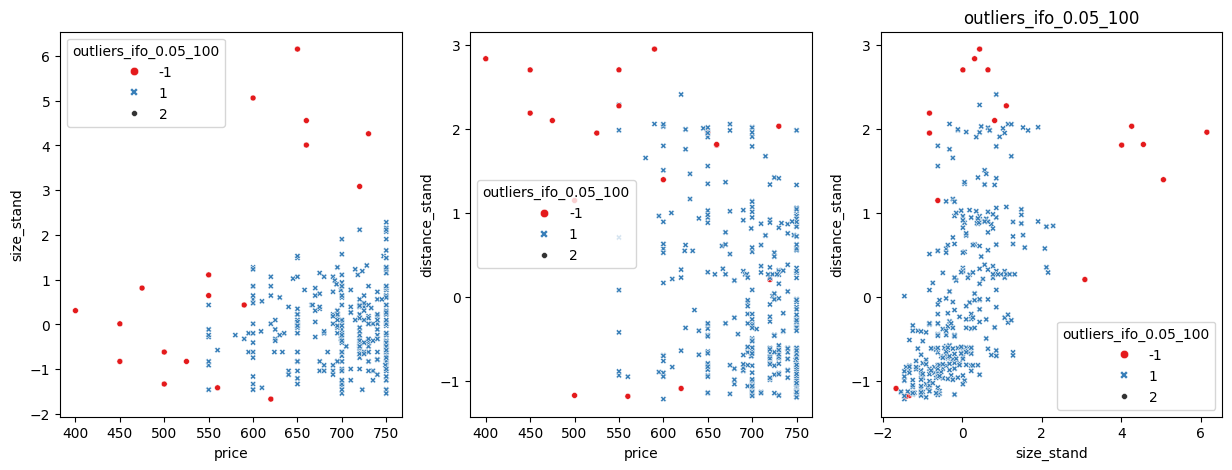

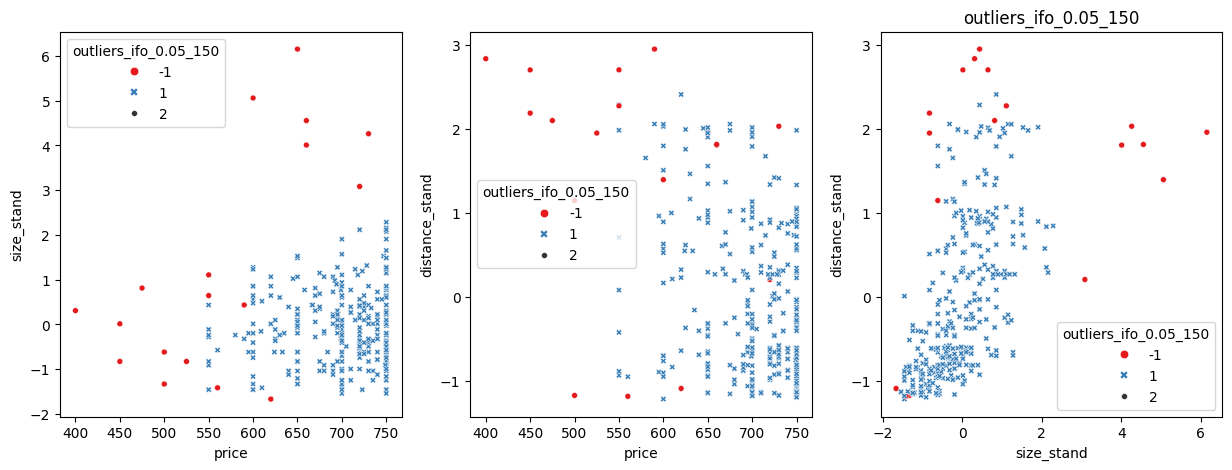

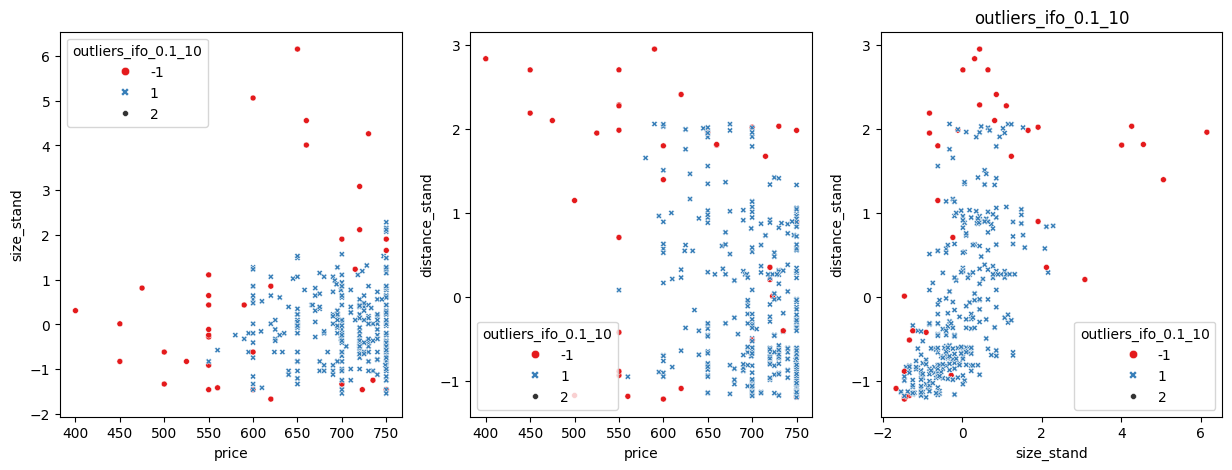

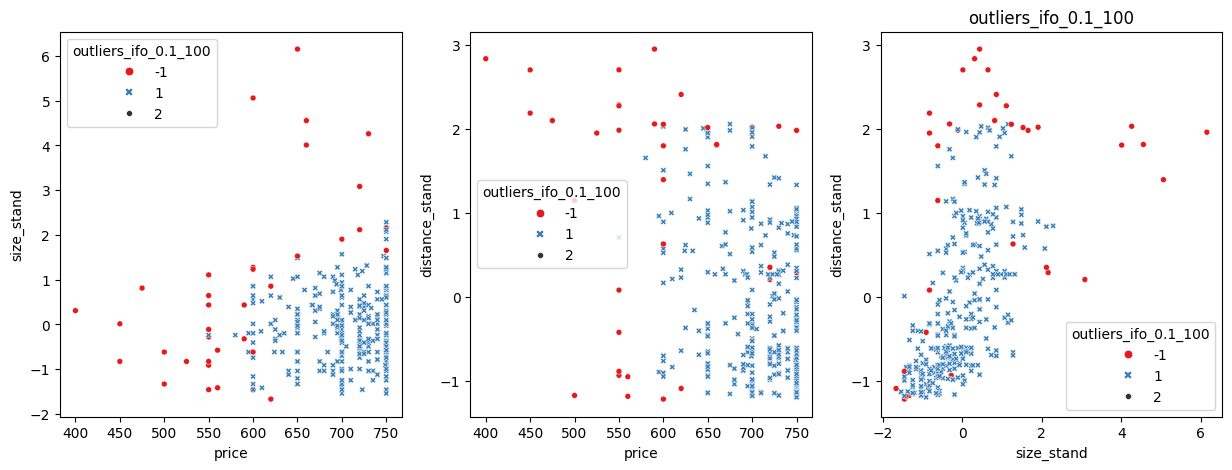

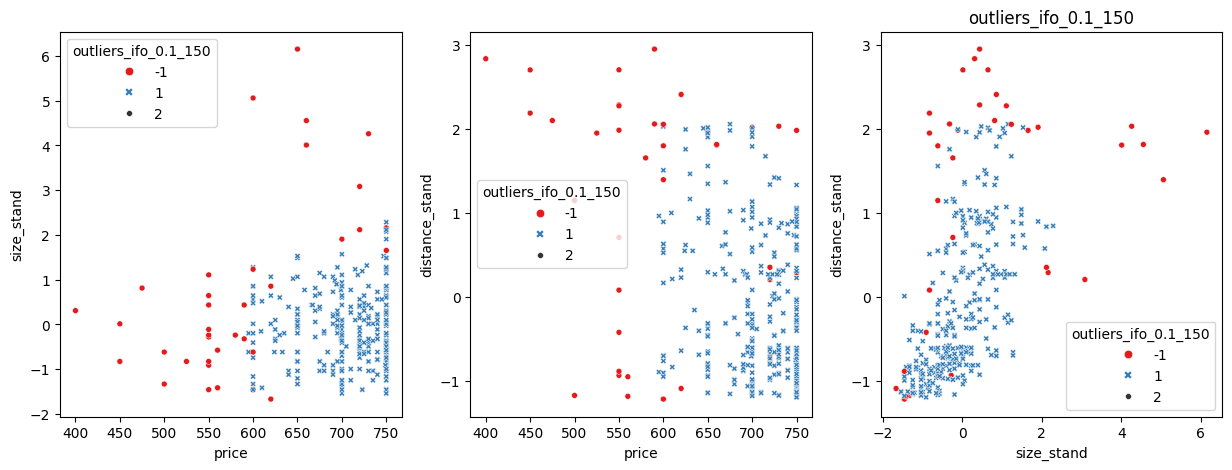

In [24]:
combinaciones_viz = list(combinations(['price', 'size_stand', 'distance_stand'], 2)) # hago combinaciones de 2
combinaciones_viz
for outlier in columnas_hue:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,5))

    for indice, tupla in enumerate(combinaciones_viz):
        sns.scatterplot(x=tupla[0],
                        y=tupla[1], 
                        ax=axes[indice],
                        data=df,
                        style=outlier,
                        size=2,
                        hue=outlier, #aqui miro todos mis graficos para ver cual me muestra los mejores OUTL
                        palette='Set1')
        
    plt.title(f'{outlier}')

In [25]:
df.head()

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_150,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_150,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_150
0,750.0,0.011443,0.762605,-0.714088,0.289977,0.480841,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1
1,750.0,0.432212,0.310888,-0.040932,0.289977,-0.966375,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1
2,400.0,0.305981,-4.730340,2.833801,0.289977,0.359317,-0.760062,-0.092582,-0.0533,-0.203219,-1.909119,5.856620,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,-2.879145,2.922420,-0.0533,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,590.0,0.432212,-2.056015,2.948728,0.289977,-1.593720,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,-0.754247,2.405922,-0.092582,-2.879145,2.922420,-0.0533,1,1,1,-1,-1,-1,-1,-1,-1
4,684.0,-0.619710,0.762605,-0.446614,-4.112120,-1.593720,-2.389728,-0.092582,-0.0533,-0.203219,-1.909119,-0.170747,2.520747,-0.488463,0.488463,2.490799,-0.722185,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1


In [26]:
# Filtrar filas donde todas las columnas de 'columnas_hue' sean iguales a -1
filtered_df = df[(df[columnas_hue] == -1).all(axis=1)]


In [27]:
filtered_df

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_150,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_150,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_150
2,400.0,0.305981,-4.730340,2.833801,0.289977,0.359317,-0.760062,-0.092582,-0.0533,-0.203219,-1.909119,5.856620,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,-2.879145,2.922420,-0.0533,-1,-1,-1,-1,-1,-1,-1,-1,-1
18,650.0,6.154670,-1.074208,1.958285,0.289977,-1.593720,-2.389728,10.801234,-0.0533,-0.203219,-1.909119,-0.170747,-0.396708,2.047236,-2.047236,-0.401478,-0.722185,-0.754247,2.405922,-0.092582,0.347325,-0.342182,-0.0533,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [28]:
df_result = df[~df.index.isin(filtered_df.index)]

In [29]:
fragmento = 0.6 * len(columnas_hue)
df_fragmento_60 = df_result[df_result[columnas_hue].eq(-1).sum(axis=1) >= fragmento]

In [30]:
df_fragmento_60

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_150,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_150,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_150
3,590.0,0.432212,-2.056015,2.948728,0.289977,-1.593720,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,-0.754247,2.405922,-0.092582,-2.879145,2.922420,-0.0533,1,1,1,-1,-1,-1,-1,-1,-1
47,500.0,-1.335018,0.762605,-1.177345,0.289977,0.785731,-0.760062,-0.092582,-0.0533,-0.203219,-1.909119,-0.170747,2.520747,2.047236,-2.047236,2.490799,-0.722185,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,-1,-1,-1,-1,-1,-1
55,720.0,3.083057,-1.023940,0.203556,0.289977,0.785731,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,2.047236,-2.047236,-0.401478,-0.722185,-0.754247,2.405922,-0.092582,-2.879145,2.922420,-0.0533,1,1,1,-1,-1,-1,-1,-1,-1
136,560.0,-1.419172,0.762605,-1.187987,0.289977,-0.966375,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,2.047236,-2.047236,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,-1,-1,-1,-1,-1,-1
186,450.0,0.011443,-3.567889,2.700545,0.289977,-1.593720,-0.760062,-0.092582,-0.0533,-0.203219,-1.909119,5.856620,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,-1,1,-1,-1,-1,-1,-1,-1,-1
188,550.0,0.642596,-3.567889,2.701210,0.289977,-1.593720,-0.760062,-0.092582,-0.0533,-0.203219,-1.909119,5.856620,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,-2.879145,2.922420,-0.0533,1,1,1,-1,-1,-1,-1,-1,-1
191,660.0,4.008748,-1.821770,1.804851,-4.112120,-1.593720,-2.389728,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,2.047236,-2.047236,-0.401478,-0.722185,-0.754247,2.405922,-0.092582,-2.879145,2.922420,-0.0533,1,1,1,-1,-1,-1,-1,-1,-1
195,660.0,4.555748,-1.821770,1.812390,0.289977,0.480841,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,2.047236,-2.047236,-0.401478,-0.722185,-0.754247,-0.415641,10.801234,-2.879145,2.922420,-0.0533,-1,1,1,-1,-1,-1,-1,-1,-1
225,730.0,4.261210,-1.821770,2.029532,0.289977,0.480841,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,-0.754247,-0.415641,10.801234,0.347325,-0.342182,-0.0533,1,1,1,-1,-1,-1,-1,-1,-1
241,475.0,0.810904,-3.674685,2.097380,0.289977,0.359317,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,-2.879145,2.922420,-0.0533,1,1,1,-1,-1,-1,-1,-1,-1


<Axes: xlabel='price', ylabel='size_stand'>

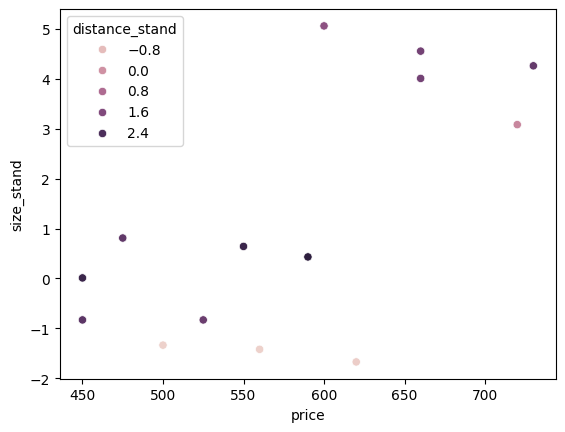

In [32]:
sns.scatterplot(x='price', y='size_stand', hue='distance_stand', data=df_fragmento_60)

In [33]:
df_elimino_1 = df_fragmento_60[(df_fragmento_60['size_stand'] > 2) & (df['price'] > 500)]

In [37]:
df_elimino_2 = df_fragmento_60[(df_fragmento_60['size_stand'] < 2) & (df['price'] < 560)]

In [45]:
df_result[(df_result['size_stand'] < 2) & (df_result['price'] < 550)]

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_150,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_150,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_150
90,500.0,-0.61971,-2.033316,1.144777,0.289977,-1.59372,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,-1,-1,-1,-1,-1


In [46]:
eliminar_prueba_1 = df_elimino_1.index
df_result = df_result.drop(eliminar_prueba_1)

In [39]:
eliminar_prueba_2 = df_elimino_2.index
df_result = df_result.drop(eliminar_prueba_2)

In [40]:
df_result.reset_index(inplace=True, drop=True)

In [47]:
df_result

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_150,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_150,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_150
0,750.0,0.011443,0.762605,-0.714088,0.289977,0.480841,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1
1,750.0,0.432212,0.310888,-0.040932,0.289977,-0.966375,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1
2,590.0,0.432212,-2.056015,2.948728,0.289977,-1.593720,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,-0.754247,2.405922,-0.092582,-2.879145,2.922420,-0.0533,1,1,1,-1,-1,-1,-1,-1,-1
3,684.0,-0.619710,0.762605,-0.446614,-4.112120,-1.593720,-2.389728,-0.092582,-0.0533,-0.203219,-1.909119,-0.170747,2.520747,-0.488463,0.488463,2.490799,-0.722185,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1
4,600.0,0.558443,-1.915261,1.505006,0.289977,0.480841,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,640.0,0.390135,-1.352245,0.932143,0.289977,0.359317,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1
336,700.0,-0.241018,-0.256093,-0.372706,0.289977,0.785731,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1
337,700.0,-0.030634,0.762605,-0.677725,0.289977,0.464947,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1
338,700.0,0.642596,0.116031,1.009599,0.289977,0.785731,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533,1,1,1,1,1,1,1,1,1


<Axes: xlabel='price', ylabel='size_stand'>

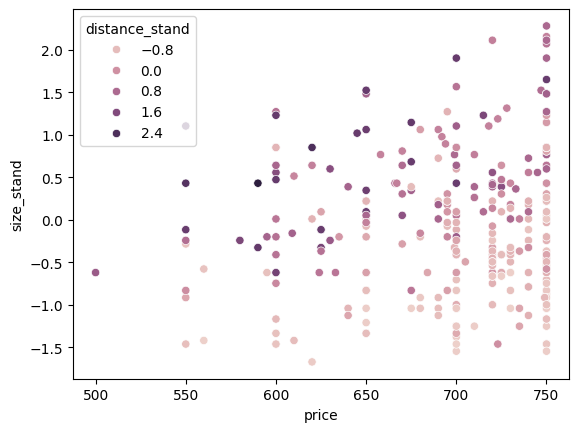

In [49]:
sns.scatterplot(x='price', y='size_stand', hue='distance_stand', data=df_result)

In [51]:
df_result = df_result[df_result['price'] > 510]

# Pendiente EDA

In [52]:
df_result.drop(columns=columnas_hue, inplace=True)

In [53]:
df_result.to_csv('..\\datos_3\\df_resultados_sin_out.csv')

In [54]:
df_result.shape

(334, 23)